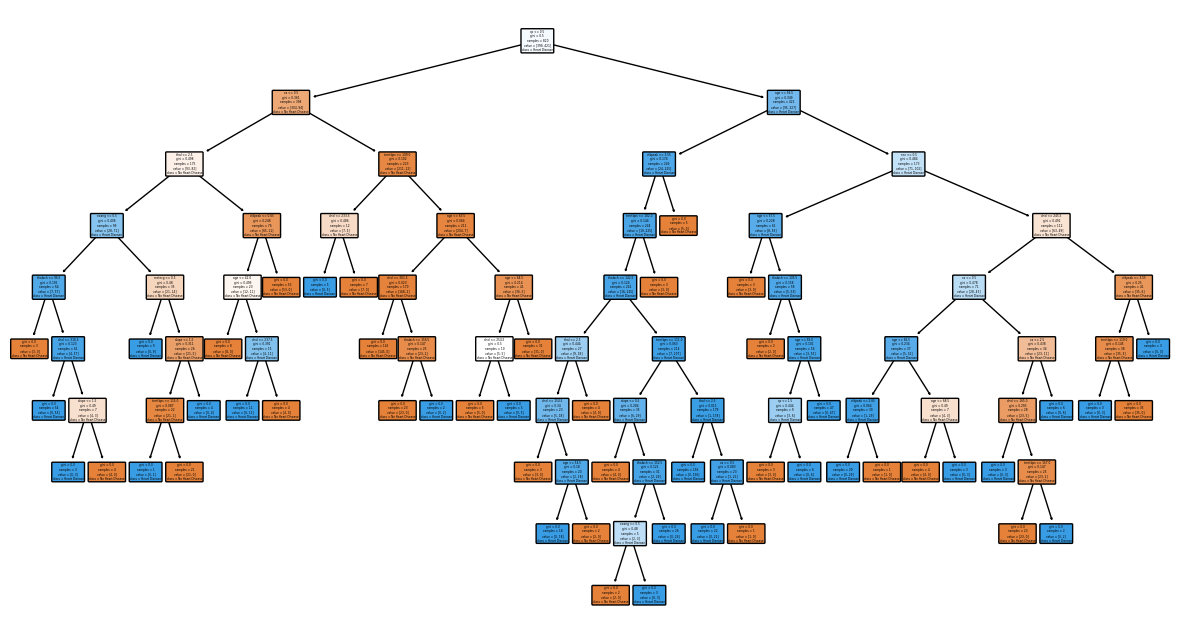

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("heart.csv")

# Features and target
X = df.drop("target", axis=1)   # assuming 'target' column is the label
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Visualize tree
plt.figure(figsize=(15,8))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["No Heart Disease", "Heart Disease"],
    filled=True,
    rounded=True
)
plt.show()


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("heart.csv")

# Features and target
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train without depth control (likely overfitting)
dt_overfit = DecisionTreeClassifier(random_state=42)
dt_overfit.fit(X_train, y_train)
y_pred_overfit = dt_overfit.predict(X_test)

print("Overfitted Tree Accuracy (train):", dt_overfit.score(X_train, y_train))
print("Overfitted Tree Accuracy (test):", accuracy_score(y_test, y_pred_overfit))

# Train with controlled depth
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)
y_pred_pruned = dt_pruned.predict(X_test)

print("\nPruned Tree Accuracy (train):", dt_pruned.score(X_train, y_train))
print("Pruned Tree Accuracy (test):", accuracy_score(y_test, y_pred_pruned))


Overfitted Tree Accuracy (train): 1.0
Overfitted Tree Accuracy (test): 0.9853658536585366

Pruned Tree Accuracy (train): 0.8853658536585366
Pruned Tree Accuracy (test): 0.8390243902439024


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("heart.csv")

# Features and target
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

print("Decision Tree Accuracy:", dt_acc)
print("Random Forest Accuracy:", rf_acc)


Decision Tree Accuracy: 0.8390243902439024
Random Forest Accuracy: 1.0


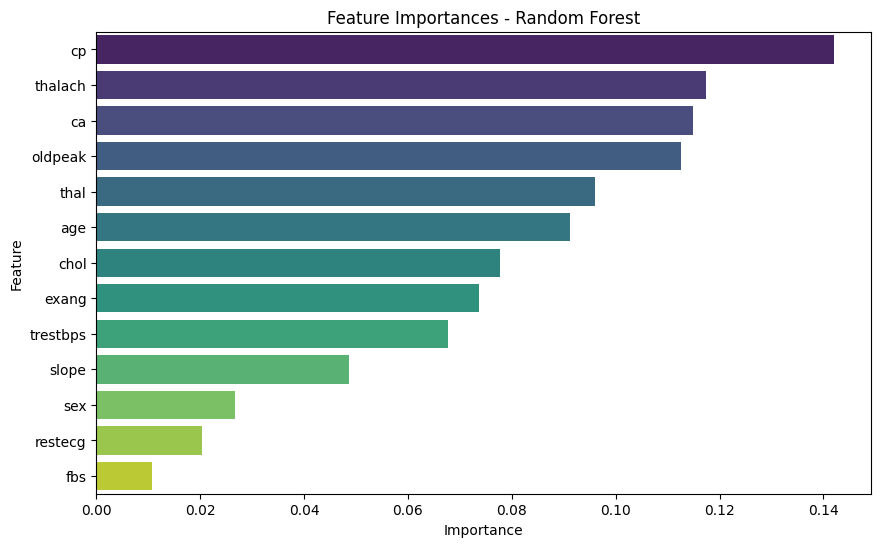

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_csv("heart.csv")

# Features and target
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importances
importances = rf.feature_importances_
feat_imp = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp, hue="Feature", dodge=False, legend=False, palette="viridis")
plt.title("Feature Importances - Random Forest")
plt.show()


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_csv("heart.csv")

# Features and target
X = df.drop("target", axis=1)
y = df["target"]

# Decision Tree (pruned)
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
cv_scores_dt = cross_val_score(dt, X, y, cv=5)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores_rf = cross_val_score(rf, X, y, cv=5)

print("Decision Tree CV Accuracy:", np.mean(cv_scores_dt))
print("Random Forest CV Accuracy:", np.mean(cv_scores_rf))


Decision Tree CV Accuracy: 0.8341463414634147
Random Forest CV Accuracy: 0.9970731707317073
